# 1 | Importing Data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("diabetes_prediction_dataset.csv")
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# 2 | Exploratory Data Analysis:

In [3]:
# Missing values check
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [4]:
# Remove duplicates
print(f"Number of duplicates: {dataset.duplicated().sum()}")
dataset.drop_duplicates(inplace=True)

Number of duplicates: 3854


Below we are looking at the **proportion** of `each class` in the dataset:

In [5]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
# Removing outliers using IQR score:

numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
# I computed IQR by considering diabetes status seperatly because otherwise we might remove some 'true outliers'
Q1_diabetes = dataset.loc[dataset.diabetes == 1, numerical_cols].quantile(0.25)
Q3_diabetes = dataset.loc[dataset.diabetes == 1, numerical_cols].quantile(0.75)
IQR_diabetes = Q3_diabetes - Q1_diabetes

Q1_no_diabetes = dataset.loc[dataset.diabetes == 0, numerical_cols].quantile(0.25)
Q3_no_diabetes = dataset.loc[dataset.diabetes == 0, numerical_cols].quantile(0.75)
IQR_no_diabetes = Q3_no_diabetes - Q1_no_diabetes

filter_diabetes = (dataset.diabetes == 1) & ((dataset[numerical_cols] < (Q1_diabetes - 1.5 * IQR_diabetes)).\
                   any(axis=1) | (dataset[numerical_cols] > (Q3_diabetes + 1.5 * IQR_diabetes)).any(axis=1))

filter_non_diabetes = (dataset.diabetes == 0) & ((dataset[numerical_cols] <\
                      (Q1_no_diabetes - 1.5 * IQR_diabetes)).any(axis=1) |\
                      (dataset[numerical_cols] > (Q3_no_diabetes + 1.5 * IQR_no_diabetes)).any(axis=1))
# filter out outliers:
dataset = dataset.loc[~filter_diabetes & ~filter_non_diabetes]

In [7]:
# The dataset is clearly inbalanced
dataset.diabetes.value_counts(normalize = True).apply(lambda x: f"{x:.2%}")

0    91.16%
1     8.84%
Name: diabetes, dtype: object

We are clearly dealing with an `inbalanced classification` problem.

## 2.1 | A look at the pairwise correlations:
- Based on the heatmap of the correlation matrix shown below, it appears that none of the features are strongly correlated with each other.

<Figure size 1000x600 with 0 Axes>

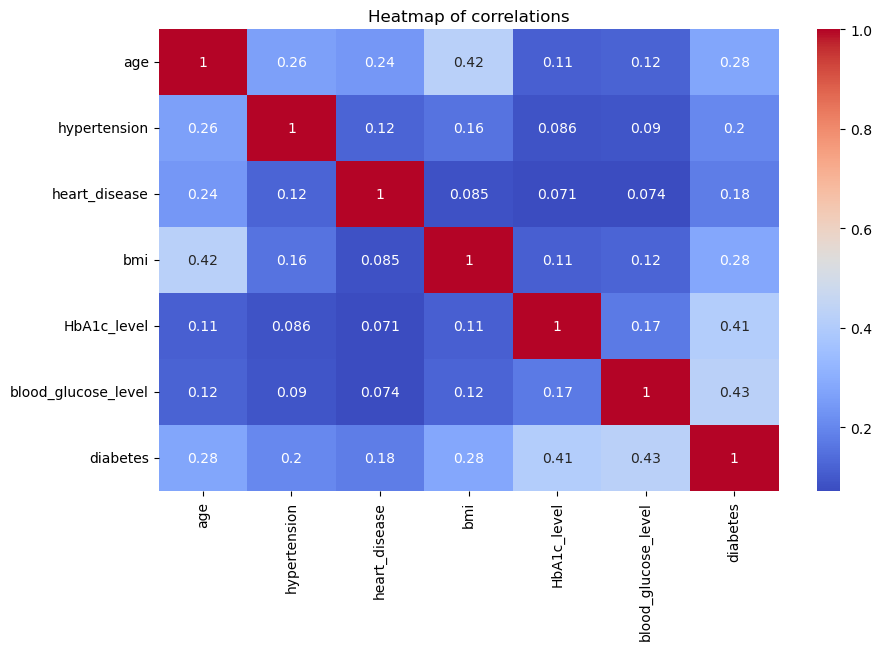

In [148]:
corr_matrix = dataset.corr()

fig = plt.figure(figsize=(10, 6))


plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap of correlations")

fig.savefig('heatmap.png')
plt.show()

## 2.2 |  Distribution of numerical features, grouped by people having diabetes or not:
- When we group the numerical features by diabetes status, we can observe a clear pattern in the `HbA1c_level` and `blood_glucose_level` variables, which respectively represent the average blood sugar level over the last 3 months and the amount of glucose in the bloodstream at a given time. The data shows that higher levels of blood sugar are strongly associated with having diabetes.
- We can also notice that `older people` are more likely to be associated with having diabetes.
- `Bmi` of people with diabetes is also higher on average compared with the bmi of people without diabetes.

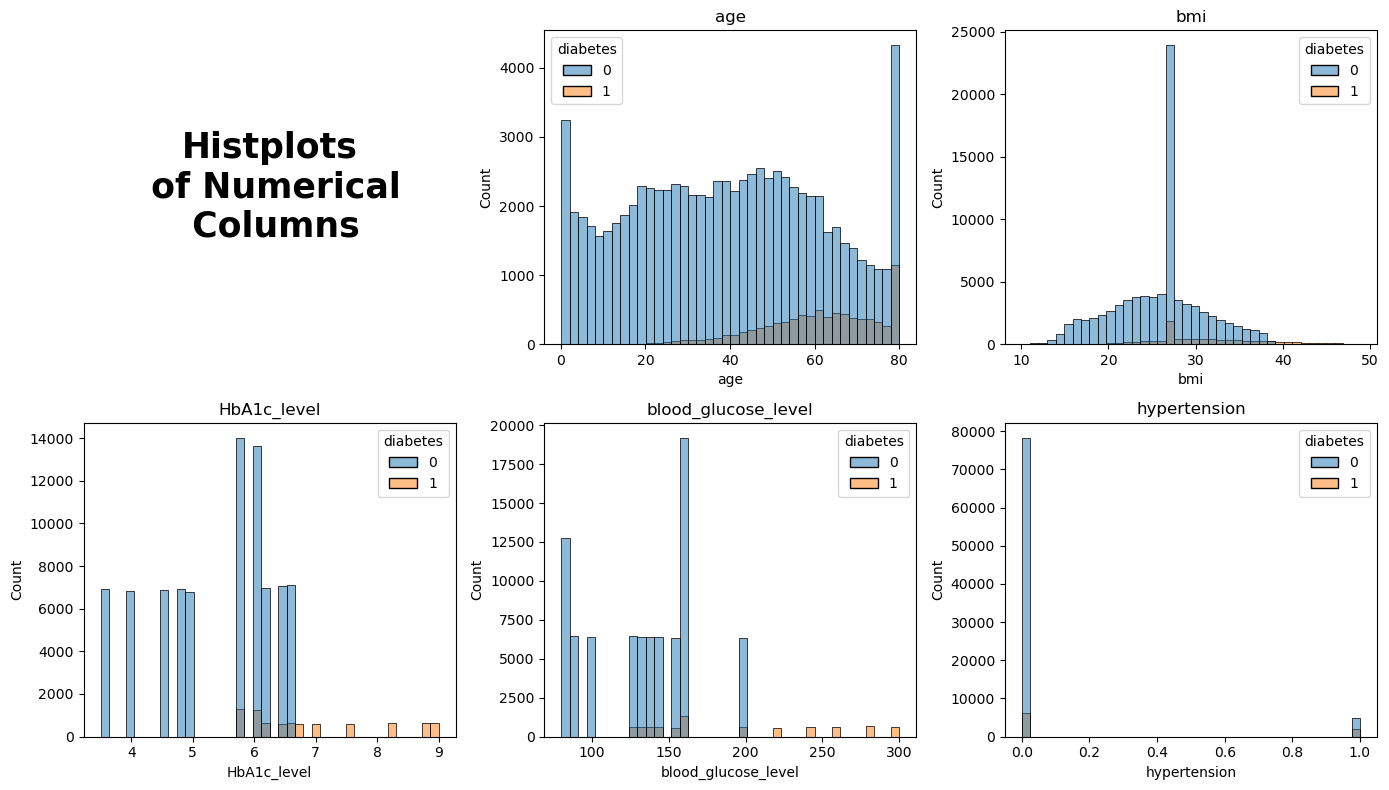

In [10]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension']


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
ax = axs[0,0]
ax.text(0.5, 0.5, "Histplots\n of Numerical\n Columns", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')

for i, col in enumerate(numerical_features):
    ax = axs[(i+1) // 3, (i+1) % 3]
    sns.histplot(dataset, x=col, hue="diabetes", ax=ax, kde=False, bins=40)
    ax.set_title(col)

fig.tight_layout()
fig.savefig('Histplots_numerical_cols.png')
plt.show()

## 2.3 | Age vs numerical columns:

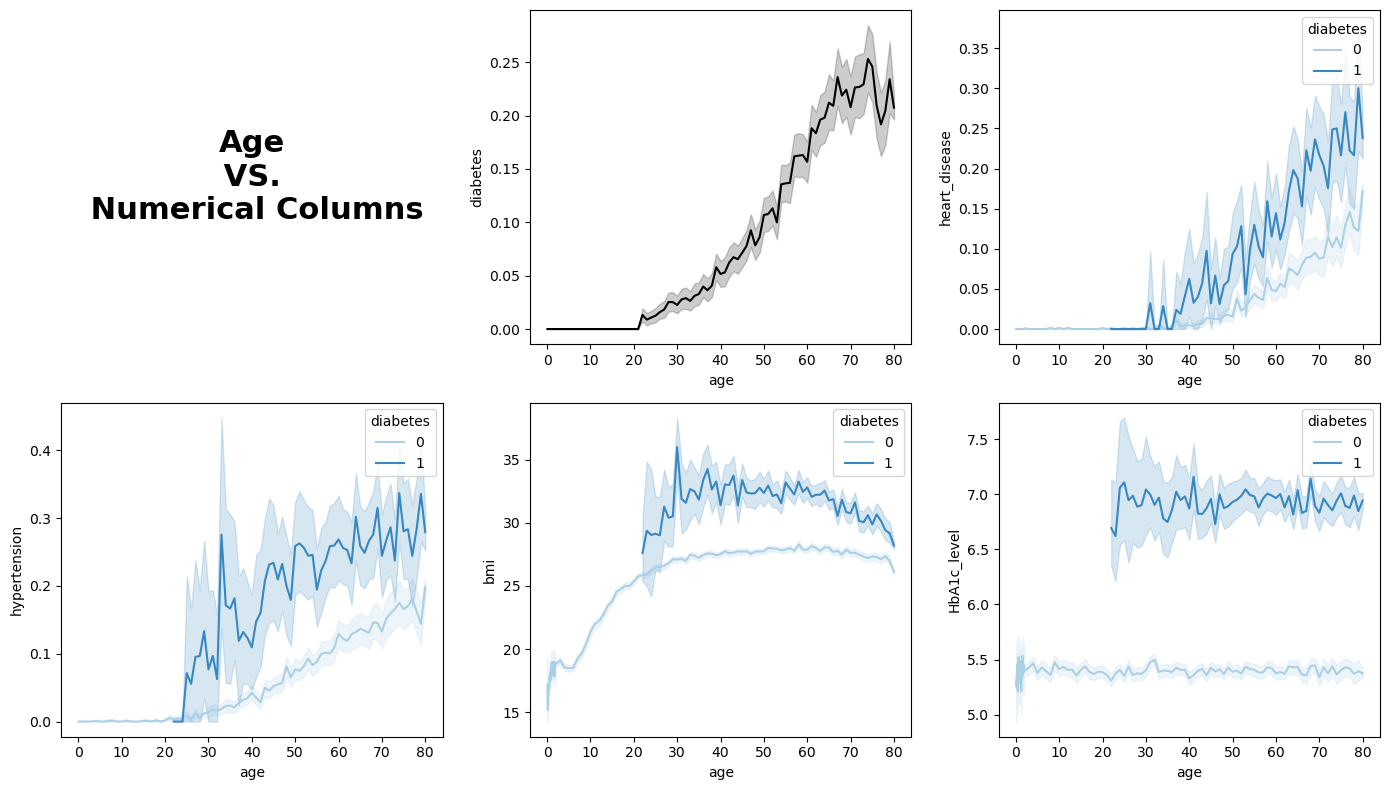

In [11]:
fig = plt.figure(figsize = (14,8))

ax = plt.subplot(2,3,1)
ax.text(0.5, 0.5, "Age\n VS. \n Numerical Columns", fontdict={'fontsize': 22, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')

plt.subplot(2,3, 2)
sns.lineplot(x = dataset['age'], y =  dataset['diabetes'], color = "black")

plt.subplot(2,3,3)
sns.lineplot(x = dataset['age'], y =  dataset['heart_disease'], hue = dataset['diabetes'], palette='Blues')


plt.subplot(2,3,4)
sns.lineplot(x = dataset['age'], y =  dataset['hypertension'], hue = dataset['diabetes'], palette='Blues')

plt.subplot(2,3,5)
sns.lineplot(x = dataset['age'],y = dataset['bmi'], hue = dataset['diabetes'], palette='Blues')

plt.subplot(2,3,6)
sns.lineplot(x = dataset['age'], y =  dataset['HbA1c_level'], hue = dataset['diabetes'], palette='Blues' )

plt.tight_layout()
fig.savefig('Age_vs_numerical_cols.png')
plt.show()

## 2.5 | Blood glucose level  a HBA1c vs diabetes:

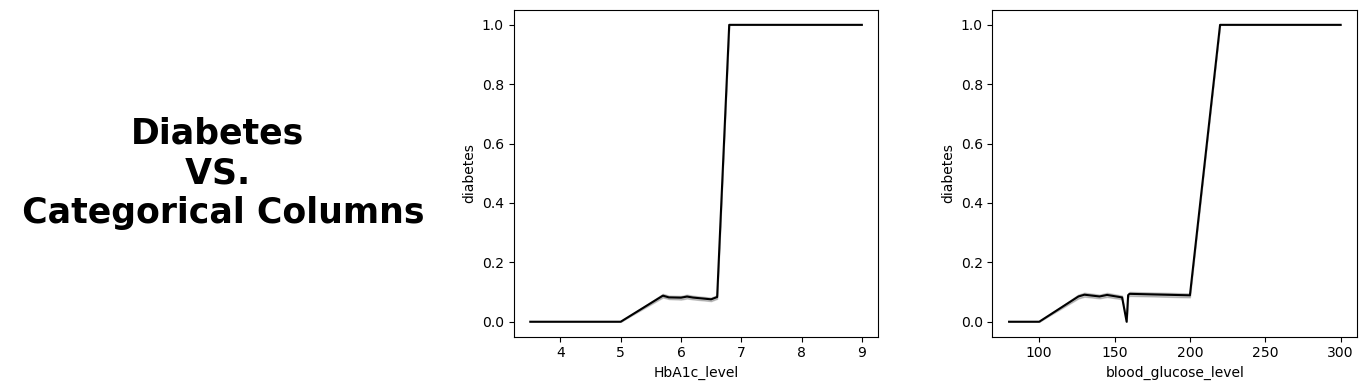

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
ax = axs[0]
ax.text(0.5, 0.5, "Diabetes\n VS. \n Categorical Columns", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')

plt.subplot(1,3, 2)
sns.lineplot(x=dataset["HbA1c_level"], y=dataset["diabetes"], ax = axs[1], color='black')

plt.subplot(1,3,3)
sns.lineplot(x=dataset["blood_glucose_level"], y=dataset["diabetes"], ax = axs[2], color='black')

plt.tight_layout()
fig.savefig('blood_glucose_hba1c_vs_diabetes.png')
plt.show()

## 3 | Feature selection based on F-statistic and on Feature importance from regression tree classifier:

In [13]:
# Split dependent variable from independent variables:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [14]:
# Encode categorical data:
X = pd.get_dummies(X, columns=['gender', 'smoking_history'])
X.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,1,0,0,0,0


### Feature Selection using F-statistic and p-value:

In [20]:
from sklearn.feature_selection import f_regression
f_statistic, p_values = f_regression(X, y)
# the F-statistic, and its p value
feature_importance = pd.concat([pd.Series(X.columns.values),
                                pd.Series(f_statistic),
                                pd.Series(p_values)], axis=1)
feature_importance.columns = ['Feature name', 'F-statistic', 'p-value']
feature_importance['p-value'] = np.where(feature_importance['p-value']<0.01, "p ≤ 0.01",
                                         feature_importance['p-value'].round(2))
feature_importance.sort_values('F-statistic', ascending=False, inplace=True)
feature_importance['F-statistic'] = feature_importance['F-statistic'].round(2)

In [23]:
print(feature_importance)

                   Feature name  F-statistic   p-value
5           blood_glucose_level     20169.61  p ≤ 0.01
4                   HbA1c_level     18029.91  p ≤ 0.01
3                           bmi      7844.18  p ≤ 0.01
0                           age      7567.05  p ≤ 0.01
1                  hypertension      3991.23  p ≤ 0.01
2                 heart_disease      2952.78  p ≤ 0.01
9       smoking_history_No Info      1310.65  p ≤ 0.01
12       smoking_history_former       948.38  p ≤ 0.01
7                   gender_Male       131.59  p ≤ 0.01
6                 gender_Female       130.71  p ≤ 0.01
11         smoking_history_ever        55.35  p ≤ 0.01
13        smoking_history_never        53.39  p ≤ 0.01
10      smoking_history_current        34.89  p ≤ 0.01
14  smoking_history_not current        33.95  p ≤ 0.01
8                  gender_Other         1.75      0.19


In [24]:
# drop the non important feature: 'gender_Other'
X.drop(['gender_Other'], axis=1, inplace=True)

We have now **removed** unnecessary features using `F-statistic` and `p-value`.

### Selection of most important features using the random forest algorithm:

Let's now select only the most relevant variables by using the weights given by the **random forest** algorithm.

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the **mean and standard deviation** of accumulation of the `impurity decrease` within each tree:

In [27]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

forest = RandomForestClassifier()
forest.fit(X, y)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
feature_importance_RF = pd.concat([pd.Series(X.columns.values),
                                   pd.Series(forest.feature_importances_),
                                   pd.Series(std)], axis=1)
feature_importance_RF.columns = ['Feature name', 'Feature importance', 'std']
feature_importance_RF.sort_values('Feature importance', ascending=False, inplace=True)
print(feature_importance_RF)

                   Feature name  Feature importance       std
4                   HbA1c_level            0.381095  0.079374
5           blood_glucose_level            0.307551  0.081655
3                           bmi            0.174854  0.030601
0                           age            0.095140  0.021336
1                  hypertension            0.012426  0.009992
2                 heart_disease            0.009649  0.008016
8       smoking_history_No Info            0.004301  0.003741
11       smoking_history_former            0.002997  0.001827
12        smoking_history_never            0.002813  0.001109
9       smoking_history_current            0.002133  0.000803
7                   gender_Male            0.001890  0.001059
13  smoking_history_not current            0.001841  0.000681
6                 gender_Female            0.001672  0.001008
10         smoking_history_ever            0.001638  0.000732


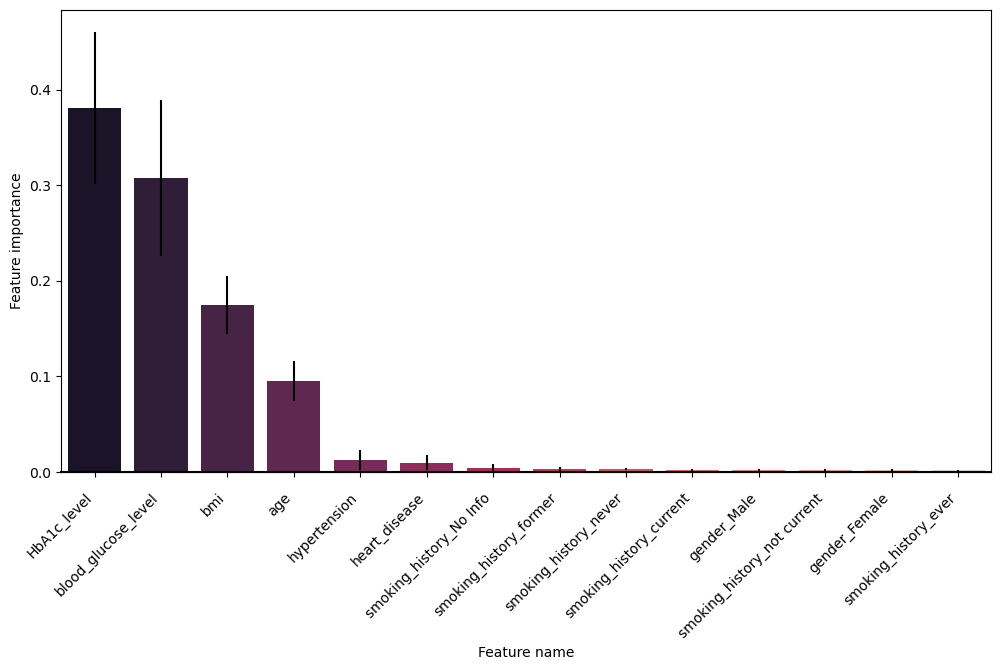

In [29]:
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data=feature_importance_RF, x='Feature name', y='Feature importance',
            palette="rocket", ax=ax1, capsize=0.1, errwidth=1.5, yerr=feature_importance_RF['std'])
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Feature importance")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.tick_params(axis='x', which='major', pad=10)
fig.savefig('feature_importance_rf.png')

In [30]:
# Select the important features:
model = SelectFromModel(RandomForestClassifier()).fit(X,y)
X = pd.DataFrame(model.transform(X), columns = model.get_feature_names_out(model.feature_names_in_))
X.shape

(91197, 4)

In [31]:
# We only have 4 remaining features out of 14
X.head()

,age,bmi,HbA1c_level,blood_glucose_level
0,80.0,25.19,6.6,140.0
1,54.0,27.32,6.6,80.0
2,28.0,27.32,5.7,158.0
3,36.0,23.45,5.0,155.0
4,76.0,20.14,4.8,155.0


**REMINDER**: As seen above, the dataset is `imbalanced`.
When splitting the dataset into a training set and a test set, we will make sure that the split is `Stratified`so that we get the same class ratios in the training and test sets compared with the entire dataset y:

## 4 | Build Classification models and pick the best one:

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

Let's verify that `Stratify`worked as expected:

In [33]:
print(f"Percentage of patients with diabetes in training set: {y_train.sum()/len(y_train):.2%}\n")
print(f"Percentage of patients with diabetes in test set: {y_test.sum()/len(y_test):.2%}")

Percentage of patients with diabetes in training set: 8.84%

Percentage of patients with diabetes in test set: 8.84%


Stratification worked **as expected**

### Standardising numerical features:

In [34]:
from sklearn.preprocessing import StandardScaler
# Standardizing the data:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression:

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, ConfusionMatrixDisplay

# define the logistic regression model
lr = LogisticRegression()

# define the hyperparameters to tune
params = [{'C': [0.05, 0.08, 0.1, 0.25, 0.5, 0.75, 1.0, 5.0], 'penalty': ['l2']}]




# perform grid search cross-validation
grid_search = GridSearchCV(
    lr,
    param_grid=params,
    scoring='roc_auc',
    cv=10,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Best hyperparameters:', grid_search.best_params_)
print('Test set roc_auc_score:', roc_auc)
print('Test set accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Best hyperparameters: {'C': 0.05, 'penalty': 'l2'}
Test set roc_auc_score: 0.821242416327578
Test set accuracy: 0.961140350877193
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20784
           1       0.88      0.65      0.75      2016

    accuracy                           0.96     22800
   macro avg       0.92      0.82      0.86     22800
weighted avg       0.96      0.96      0.96     22800



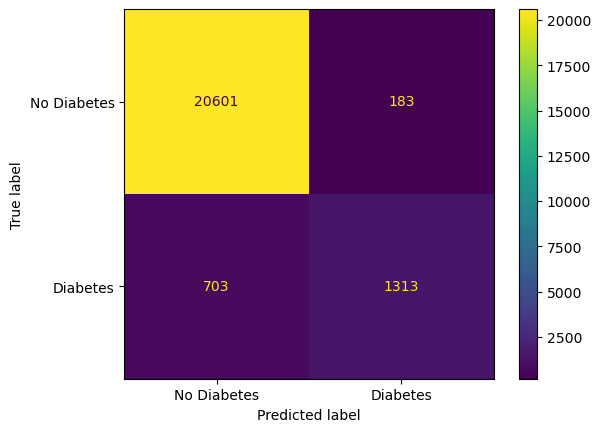

In [36]:
ConfusionMatrixDisplay.from_estimator(grid_search,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No Diabetes', 'Diabetes'])

## K-NN

In [37]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
knn = KNeighborsClassifier()
params = {'n_neighbors': [1, 4, 9, 13, 25, 50, 75, 100, 150, 200, 300, 500]}

# perform grid search cross-validation
grid_search = GridSearchCV(
    knn,
    param_grid=params,
    scoring='roc_auc',
    cv=3,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Best hyperparameters:', grid_search.best_params_)
print('Test set roc_auc_score:', roc_auc)
print('Test set accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Best hyperparameters: {'n_neighbors': 200}
Test set roc_auc_score: 0.8069233659591628
Test set accuracy: 0.9656578947368422
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     20784
           1       1.00      0.61      0.76      2016

    accuracy                           0.97     22800
   macro avg       0.98      0.81      0.87     22800
weighted avg       0.97      0.97      0.96     22800

CPU times: user 2.24 s, sys: 99.3 ms, total: 2.34 s
Wall time: 11.6 s


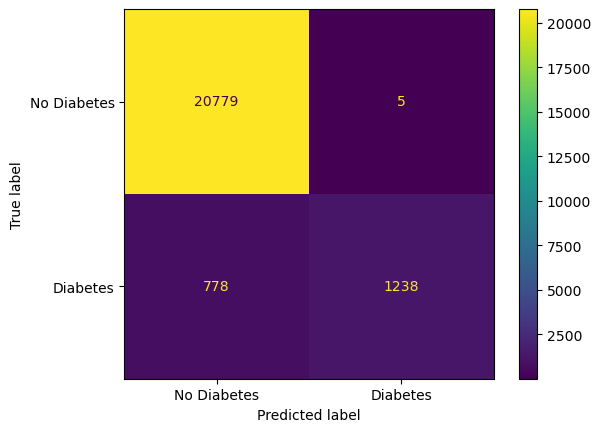

In [38]:
ConfusionMatrixDisplay.from_estimator(grid_search,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No Diabetes', 'Diabetes'])

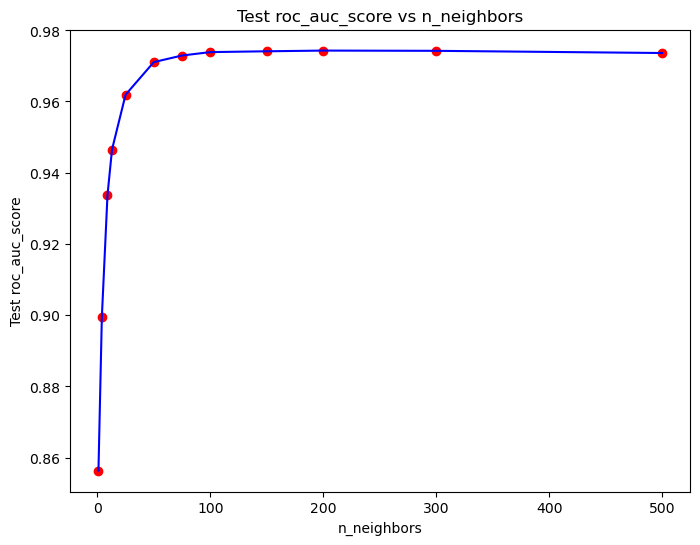

In [39]:
results = grid_search.cv_results_

# Get the values of n_neighbors and their corresponding mean training scores
n_neighbors = results['param_n_neighbors'].data.astype(int)
test_scores = results['mean_test_score']

# Plot the accuracies
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(n_neighbors, test_scores, color = 'red')
ax.plot(n_neighbors, test_scores, color = 'blue')
ax.set_xlabel('n_neighbors')
ax.set_ylabel('Test roc_auc_score')
ax.set_title('Test roc_auc_score vs n_neighbors')


plt.show()

## Kernel SVM: RBF

In [41]:
%%time
from sklearn.svm import SVC

svm_classifier = SVC()
params = {'kernel': ['rbf'], 'C': [5, 10, 15], 'gamma': [0.1, 1, 10]}

# perform grid search cross-validation
grid_search = HalvingGridSearchCV(
    svm_classifier,
    param_grid=params,
    scoring='roc_auc',
    cv=3,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Best hyperparameters:', grid_search.best_params_)
print('Test set roc_auc_score:', roc_auc)
print('Test set accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Best hyperparameters: {'C': 15, 'gamma': 0.1, 'kernel': 'rbf'}
Test set roc_auc_score: 0.8394134453242422
Test set accuracy: 0.9714035087719298
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     20784
           1       1.00      0.68      0.81      2016

    accuracy                           0.97     22800
   macro avg       0.98      0.84      0.90     22800
weighted avg       0.97      0.97      0.97     22800

CPU times: user 27.3 s, sys: 680 ms, total: 27.9 s
Wall time: 1min 9s


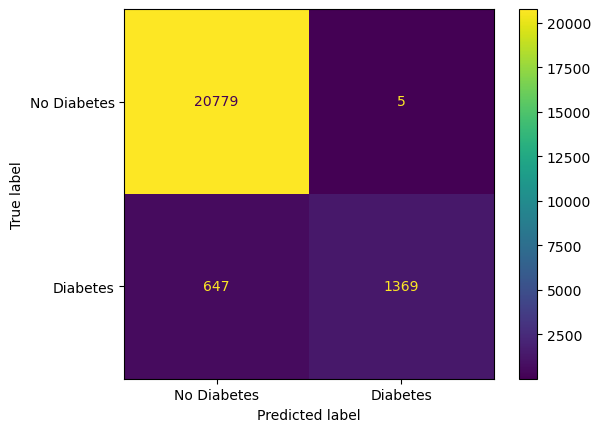

In [43]:
ConfusionMatrixDisplay.from_estimator(grid_search,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No Diabetes', 'Diabetes'])

## Random Forest:

In [44]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
params = {
    'n_estimators': [200, 250, 300],
    'max_depth': [8, 10, 15],
    'min_samples_split': [10, 15, 25, 50],
    'min_samples_leaf': [3, 4, 10],
    'bootstrap': [True, False]
}


# perform grid search cross-validation
grid_search = HalvingGridSearchCV(
    rfc,
    param_grid=params,
    scoring='roc_auc',
    cv=3,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Best hyperparameters:', grid_search.best_params_)
print('Test set roc_auc_score:', roc_auc)
print('Test set accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Best hyperparameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 200}
Test set roc_auc_score: 0.8665674603174602
Test set accuracy: 0.9764035087719298
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     20784
           1       1.00      0.73      0.85      2016

    accuracy                           0.98     22800
   macro avg       0.99      0.87      0.92     22800
weighted avg       0.98      0.98      0.97     22800

CPU times: user 11.6 s, sys: 2.58 s, total: 14.2 s
Wall time: 1min 13s


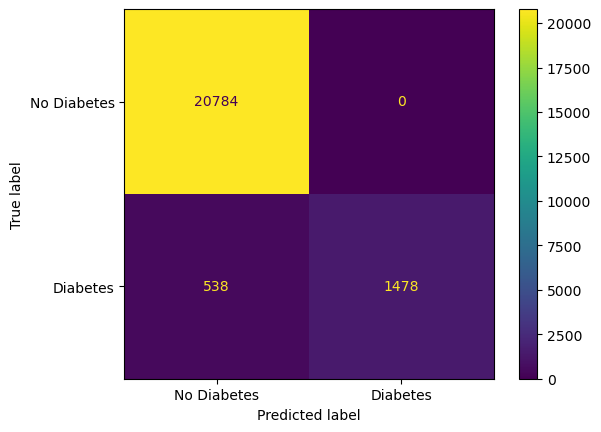

In [45]:
ConfusionMatrixDisplay.from_estimator(grid_search,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No Diabetes', 'Diabetes'])

## XGBoost:
Building trees using **early stopping** instead of fixing an optimal number of trees (determined using cross-validation):

### Optimize Hyperparameters using Cross Validation and Grid Search:

We will use GridSearchCV() to test many possible combinations of the hyperparameters.

In [140]:
%%time
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                            use_label_encoder=False,
                            seed=0,
                            eval_metric='aucpr')




params = {
    'subsample': [0.9],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 1, 10],
    'reg_lambda': [0, 1, 10]
#    'scale_pos_weight': [3, 4, 5]
}


# perform grid search cross-validation
grid_search = HalvingGridSearchCV(
    xgb_clf,
    param_grid=params,
    scoring='roc_auc',
    cv=3,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Best hyperparameters:', grid_search.best_params_)
print('Test set roc_auc_score:', roc_auc)
print('Test set accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Best hyperparameters: {'gamma': 1, 'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 1, 'subsample': 0.9}
Test set roc_auc_score: 0.8665674603174602
Test set accuracy: 0.9764035087719298
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     20784
           1       1.00      0.73      0.85      2016

    accuracy                           0.98     22800
   macro avg       0.99      0.87      0.92     22800
weighted avg       0.98      0.98      0.97     22800

CPU times: user 19.4 s, sys: 1.44 s, total: 20.9 s
Wall time: 1min 14s


Let's take the `Best Hyperparameters`to create our final **XGBoost** model:

In [141]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',
                            use_label_encoder=False,
                            seed=0,
                            subsample=0.9,
                            max_depth=5,
                            gamma=1,
                            learning_rate=0.01,
                            reg_lambda=1,
                            eval_metric='aucpr'
                           )
xgb_clf.fit(X_train,
           y_train,
            verbose=True,
            early_stopping_rounds=10,
           eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.85583
[1]	validation_0-aucpr:0.85583
[2]	validation_0-aucpr:0.85583
[3]	validation_0-aucpr:0.85583
[4]	validation_0-aucpr:0.85593
[5]	validation_0-aucpr:0.85593
[6]	validation_0-aucpr:0.85593
[7]	validation_0-aucpr:0.85619
[8]	validation_0-aucpr:0.85619
[9]	validation_0-aucpr:0.85640
[10]	validation_0-aucpr:0.85640
[11]	validation_0-aucpr:0.85640
[12]	validation_0-aucpr:0.85640
[13]	validation_0-aucpr:0.85640
[14]	validation_0-aucpr:0.85637
[15]	validation_0-aucpr:0.85738
[16]	validation_0-aucpr:0.85738
[17]	validation_0-aucpr:0.85738
[18]	validation_0-aucpr:0.86313
[19]	validation_0-aucpr:0.86313
[20]	validation_0-aucpr:0.86318
[21]	validation_0-aucpr:0.86318
[22]	validation_0-aucpr:0.86338
[23]	validation_0-aucpr:0.86338
[24]	validation_0-aucpr:0.86338
[25]	validation_0-aucpr:0.86338
[26]	validation_0-aucpr:0.86338
[27]	validation_0-aucpr:0.86338
[28]	validation_0-aucpr:0.86334
[29]	validation_0-aucpr:0.86334
[30]	validation_0-aucpr:0.86334
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='aucpr', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              subsample=0.9, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [142]:
# evaluate the best model on the test set
y_pred = xgb_clf.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Test set roc_auc_score:', roc_auc)
print('Test set accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Test set roc_auc_score: 0.8665674603174602
Test set accuracy: 0.9764035087719298
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     20784
           1       1.00      0.73      0.85      2016

    accuracy                           0.98     22800
   macro avg       0.99      0.87      0.92     22800
weighted avg       0.98      0.98      0.97     22800



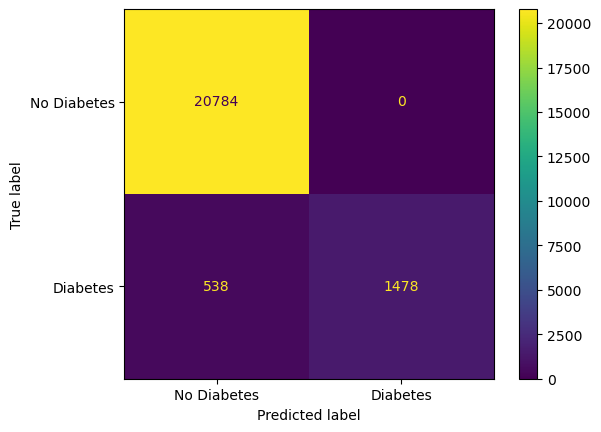

In [143]:
ConfusionMatrixDisplay.from_estimator(xgb_clf,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No Diabetes', 'Diabetes'])

# 5 | Comparing all models together:

In [144]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_validate
seed = 0

# prepare models with the optimal hyperparameters
models = []
models.append(('LR', LogisticRegression(C = 0.05, penalty = 'l2')))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 200)))
models.append(('SVM', SVC(C = 15, gamma = 0.1, kernel = 'rbf')))
models.append(('RF', RandomForestClassifier(bootstrap = False, max_depth = 10,
                       min_samples_leaf = 10, min_samples_split = 15,
                       n_estimators = 200)))
models.append(('XGB', xgb.XGBClassifier(objective='binary:logistic',
                            use_label_encoder=False,
                            seed=0,
                            subsample=0.9,
                            max_depth=5,
                            gamma=1,
                            learning_rate=0.01,
                            reg_lambda=1,
                            eval_metric='aucpr'
                           )))

# evaluate each model in turn
results = {}
scorings = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
for name, model in models:
    kfold = StratifiedKFold(n_splits=10)

    cv_results = cross_validate(model, X_test, y_test, cv=kfold, scoring=scorings)
    for score, value in cv_results.items():
        msg = "%s: %s: %f (%f)" % (name, score, value.mean(), value.std())
        print(msg)
    print("\n")
    results[name] = cv_results

LR: fit_time: 0.025275 (0.027577)
LR: score_time: 0.005228 (0.000978)
LR: test_accuracy: 0.961272 (0.003145)
LR: test_precision: 0.889370 (0.021260)
LR: test_recall: 0.641860 (0.024994)
LR: test_f1: 0.745435 (0.022233)
LR: test_roc_auc: 0.967248 (0.005077)


KNN: fit_time: 0.008862 (0.001877)
KNN: score_time: 0.342805 (0.014944)
KNN: test_accuracy: 0.961623 (0.002514)
KNN: test_precision: 1.000000 (0.000000)
KNN: test_recall: 0.565935 (0.028960)
KNN: test_f1: 0.722371 (0.023657)
KNN: test_roc_auc: 0.975605 (0.004000)


SVM: fit_time: 1.736304 (0.052208)
SVM: score_time: 0.497243 (0.012167)
SVM: test_accuracy: 0.969518 (0.001584)
SVM: test_precision: 0.997019 (0.005000)
SVM: test_recall: 0.657236 (0.017754)
SVM: test_f1: 0.792088 (0.012958)
SVM: test_roc_auc: 0.958730 (0.005808)


RF: fit_time: 2.035922 (0.118251)
RF: score_time: 0.093047 (0.000836)
RF: test_accuracy: 0.976272 (0.002531)
RF: test_precision: 0.998025 (0.004257)
RF: test_recall: 0.733122 (0.029227)
RF: test_f1: 0.844960 (

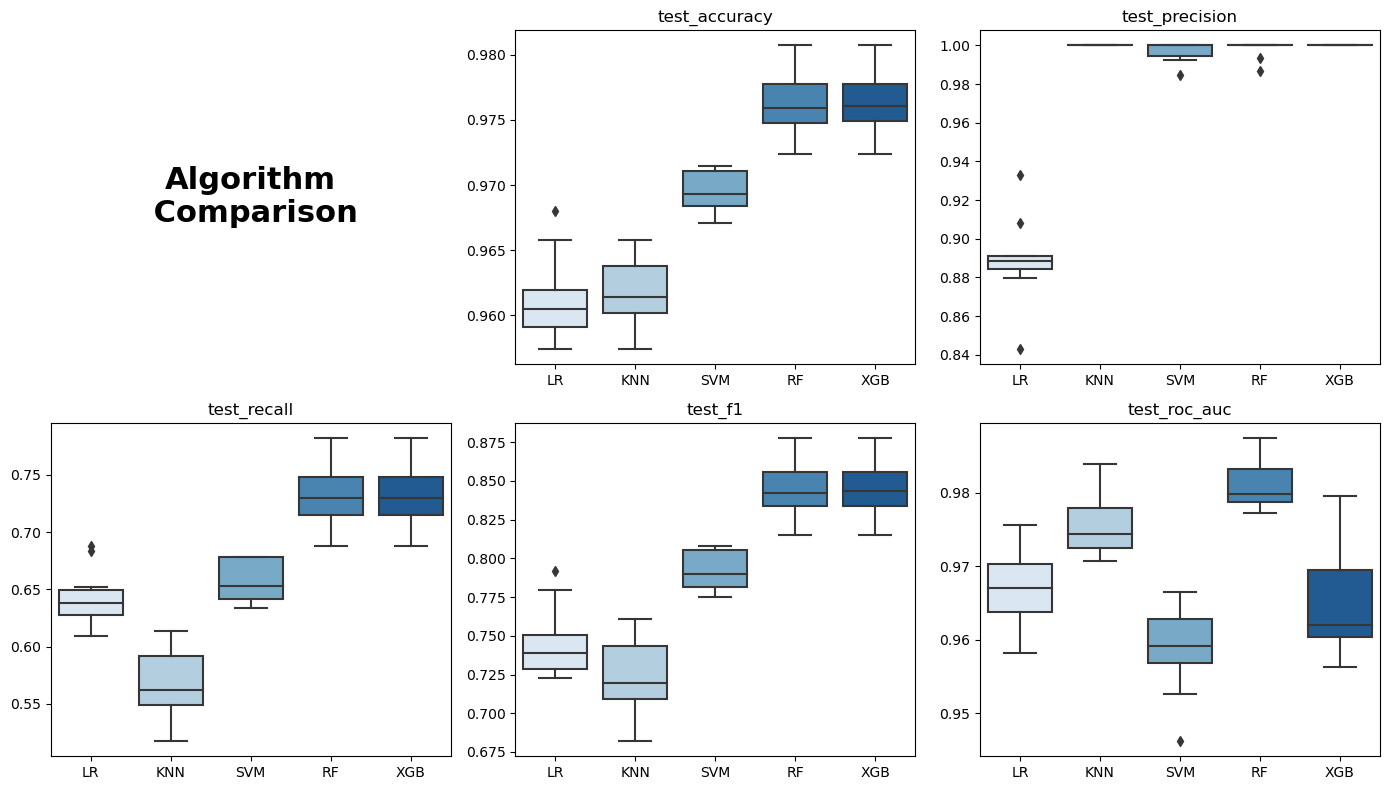

In [145]:
fig = plt.figure(figsize = (14,8))

ax = plt.subplot(2,3,1)
ax.text(0.5, 0.5, "Algorithm\n Comparison", fontdict={'fontsize': 22, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')

for i, scoring in enumerate([s for s in results['LR'].keys() if s not in ('fit_time', 'score_time')]):
    plt.subplot(2,3, i+2)
    plt.title(scoring)
    sns.boxplot(pd.concat([pd.Series(results[name][scoring]).rename(name) for name in results.keys()],
                          axis=1), palette='Blues')
plt.tight_layout()
fig.savefig('Algorithm_comparison.png')
plt.show()

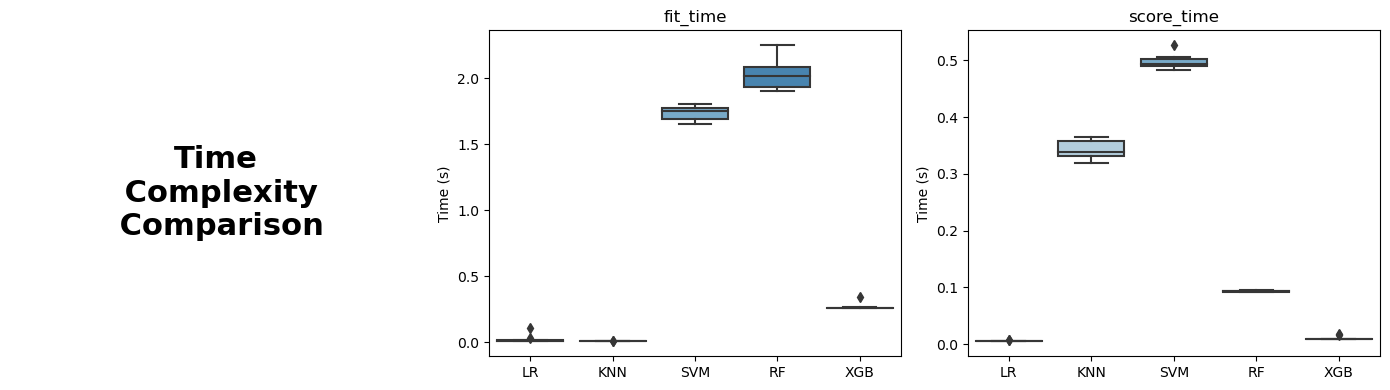

In [146]:
fig = plt.figure(figsize = (14,4))

ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, "Time\n Complexity\n Comparison", fontdict={'fontsize': 22, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')

for i, scoring in enumerate(['fit_time', 'score_time']):
    plt.subplot(1,3, i+2)
    plt.title(scoring)
    plt.ylabel("Time (s)")
    sns.boxplot(pd.concat([pd.Series(results[name][scoring]).rename(name) for name in results.keys()],
                          axis=1), palette='Blues')
plt.tight_layout()
fig.savefig('time_complexity_comparison.png')
plt.show()